In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [32]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1


In [33]:
!unzip vjchoudhary7/customer-segmentation-tutorial-in-python

unzip:  cannot find or open vjchoudhary7/customer-segmentation-tutorial-in-python, vjchoudhary7/customer-segmentation-tutorial-in-python.zip or vjchoudhary7/customer-segmentation-tutorial-in-python.ZIP.


In [34]:
import pandas as pd

# Using the path variable from the kagglehub download
df = pd.read_csv(path + '/Mall_Customers.csv')
# Assuming 'Mall_Customers.csv' is in the downloaded directory

# Print the first few rows of the DataFrame to check if it loaded correctly
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [36]:
df.value_counts()

,,,,,count
CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),
1,Male,19,15,39,1
138,Male,32,73,73,1
128,Male,40,71,95,1
129,Male,59,71,11,1
130,Male,38,71,75,1
...,...,...,...,...,...
70,Female,32,48,47,1
71,Male,70,49,55,1
72,Female,47,49,42,1


In [37]:
df.duplicated().sum()

0

In [38]:
# Assuming 'Gender' column exists in your DataFrame 'df'
df['Gender_Binary'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Print the DataFrame to verify the new column
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Gender_Binary  
0              1  
1              1  
2              0  
3              0  
4              0  


In [39]:
# Remove duplicate rows
df = df.drop_duplicates()
# Check for missing values
print(df.isnull().sum())


print(df.head())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Gender_Binary             0
dtype: int64
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Gender_Binary  
0              1  
1              1  
2              0  
3              0  
4              0  


In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]
y = df['Gender_Binary']
standerd_scaler = StandardScaler()
X = standerd_scaler.fit_transform(X)


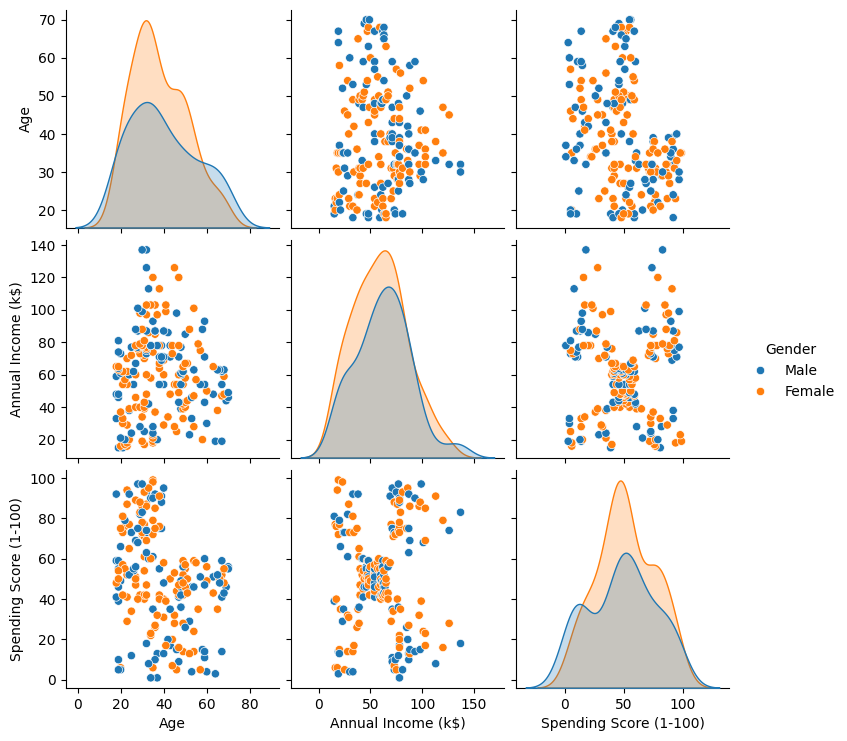

In [41]:
# Pairplot to visualize relationships (using numeric_df for correlation)
sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Gender')
plt.show()



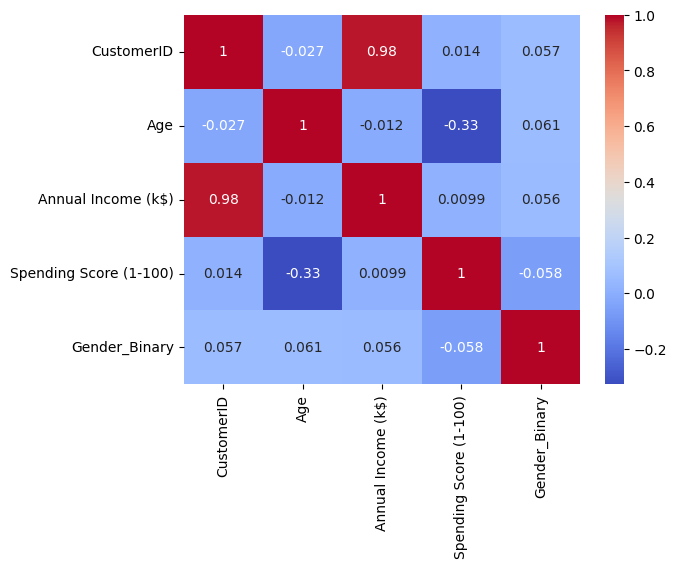

In [42]:
# Before calculating correlation, select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap (using numeric_df for correlation)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [43]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.metrics import silhouette_score


In [44]:
# Apply K-Means with an arbitrary number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the dataframe
df['Cluster'] = clusters

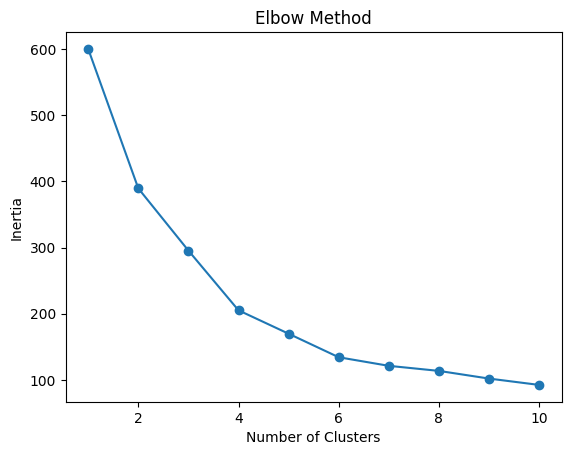

In [45]:
# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot inertia vs. number of clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [46]:
# Silhouette Score
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(X)
    score = silhouette_score(X, preds)
    print(f'Clusters: {k}, Silhouette Score: {score}')

Clusters: 2, Silhouette Score: 0.33547192894004574
Clusters: 3, Silhouette Score: 0.3579234303882264
Clusters: 4, Silhouette Score: 0.4039582785148566
Clusters: 5, Silhouette Score: 0.40846873777345605


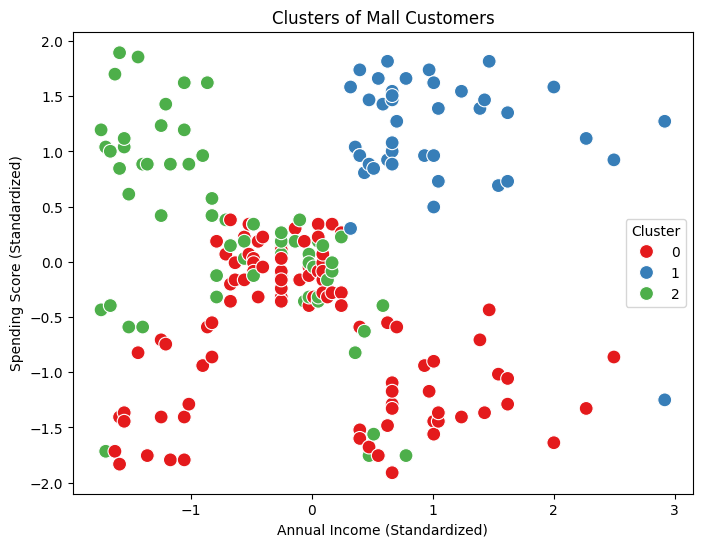

In [47]:
# Visualize clusters in a 2D plot (use PCA or t-SNE if needed)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X[:, 1], y=X[:, 2],
    hue=df['Cluster'], palette='Set1', s=100
)
plt.title('Clusters of Mall Customers')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.legend(title='Cluster')
plt.show()


In [48]:
import pandas as pd
import numpy as np

# Example DataFrame (replace 'data' with your actual dataset)
# Assuming 'scaled_features' is the normalized data and 'cluster_labels' are the cluster predictions
data = pd.DataFrame({
    'Age': [19, 35, 40, 23, 31],
    'Annual Income': [15, 45, 60, 25, 35],
    'Spending Score': [39, 81, 6, 77, 40],
    'Cluster': [0, 1, 2, 0, 1]  # Example cluster labels
})

# Group data by clusters and compute mean statistics for each cluster
cluster_analysis = data.groupby('Cluster').agg({
    'Age': ['mean', 'min', 'max'],
    'Annual Income': ['mean', 'min', 'max'],
    'Spending Score': ['mean', 'min', 'max']
})

# Rename columns for better readability
cluster_analysis.columns = ['_'.join(col).strip() for col in cluster_analysis.columns.values]
cluster_analysis.reset_index(inplace=True)

print("Cluster Analysis:")
print(cluster_analysis)

# Example interpretation logic
for cluster_id, cluster_data in cluster_analysis.iterrows():
    print(f"\nCluster {int(cluster_data['Cluster'])}:")
    print(f" - Average Age: {cluster_data['Age_mean']:.2f}")
    print(f" - Annual Income: {cluster_data['Annual Income_mean']:.2f} (Range: {cluster_data['Annual Income_min']}-{cluster_data['Annual Income_max']})")
    print(f" - Spending Score: {cluster_data['Spending Score_mean']:.2f} (Range: {cluster_data['Spending Score_min']}-{cluster_data['Spending Score_max']})")


Cluster Analysis:
   Cluster  Age_mean  Age_min  Age_max  Annual Income_mean  Annual Income_min  \
0        0      21.0       19       23                20.0                 15   
1        1      33.0       31       35                40.0                 35   
2        2      40.0       40       40                60.0                 60   

   Annual Income_max  Spending Score_mean  Spending Score_min  \
0                 25                 58.0                  39   
1                 45                 60.5                  40   
2                 60                  6.0                   6   

   Spending Score_max  
0                  77  
1                  81  
2                   6  

Cluster 0:
 - Average Age: 21.00
 - Annual Income: 20.00 (Range: 15.0-25.0)
 - Spending Score: 58.00 (Range: 39.0-77.0)

Cluster 1:
 - Average Age: 33.00
 - Annual Income: 40.00 (Range: 35.0-45.0)
 - Spending Score: 60.50 (Range: 40.0-81.0)

Cluster 2:
 - Average Age: 40.00
 - Annual Income: 60.00 